# TM10007 Assignment template

In [45]:
# Run this to use from colab environment
#!pip install -q --upgrade git+https://github.com/karinvangarderen/tm10007_project.git
#!pip install sklearn 

## Import Modules

In [46]:
# Import data module
from adni.load_data import load_data
# Import needed modules
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score #kan elke zijn die we willen gebruiken

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

Data loading

In [47]:
# Data loading 
data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')
df= pd.DataFrame(data)

# Reset index, add patient ID's as column
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'ID'})

# set seed

display(df)

The number of samples: 855
The number of columns: 268


,ID,hf_energy,hf_entropy,hf_kurtosis,hf_max,hf_mean,hf_median,hf_min,hf_peak,hf_quartile_range,...,"vf_Frangi_inner_kurtosis_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_max_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_mean_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_median_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_min_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_peak_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_quartile_range_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_range_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_skewness_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_std_SR(1.0, 10.0)_SS2.0"
0,0_002_S_0413_bl_0,5403.229408,4.679203,2.392463,2.040475,1.375697,1.487644,-0.062859,429,0.364471,...,4.283295,1.930203e-09,4.762307e-10,3.147900e-10,1.195016e-10,8,4.503026e-10,1.810702e-09,2.003542,4.207831e-10
1,0_002_S_0559_bl_0,922.459760,4.772376,1.709731,1.437500,0.863074,0.940709,-0.247543,412,0.347258,...,2.048344,1.189167e-09,3.678934e-10,3.325169e-10,6.933179e-13,11,4.380055e-10,1.188474e-09,1.231615,3.137258e-10
2,0_002_S_0619_bl_0,1674.765276,5.369472,-1.051024,1.691528,0.744530,0.938191,-0.478300,187,1.081807,...,2.129459,1.683421e-09,5.235571e-10,4.105990e-10,7.585248e-11,33,5.472382e-10,1.607568e-09,1.389308,4.219847e-10
3,0_002_S_0685_bl_0,3443.797200,4.613089,3.404878,1.775424,1.236849,1.308478,0.062127,419,0.311673,...,0.678418,1.853995e-10,4.602008e-11,1.540497e-11,3.387661e-13,4,5.488386e-11,1.850608e-10,1.427118,5.954654e-11
4,0_002_S_0816_bl_0,914.469846,4.647179,3.574511,1.453932,0.949651,1.010272,-0.144106,363,0.320707,...,-0.756966,1.225707e-09,4.043265e-10,2.996961e-10,1.493024e-17,8,6.765193e-10,1.225707e-09,0.802724,4.174750e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,0_941_S_4292_bl_0,1503.564446,4.490768,2.368284,1.724321,1.094387,1.097217,0.353424,312,0.338568,...,2.546910,9.792177e-10,2.269858e-10,1.275302e-10,5.469078e-123,35,3.636393e-10,9.792177e-10,1.593950,2.792072e-10
851,0_941_S_4365_bl_0,1087.136508,4.929075,0.284622,1.582494,0.859611,0.987315,-0.347672,312,0.526742,...,1.285397,1.173355e-09,3.692482e-10,2.729788e-10,2.274326e-24,40,4.407750e-10,1.173355e-09,1.175030,3.406526e-10
852,0_941_S_4376_bl_0,1963.323949,4.619950,2.012379,1.794024,1.167033,1.206801,0.168814,270,0.365045,...,1.503238,4.483208e-10,1.257173e-10,8.605877e-11,9.895392e-17,23,1.722120e-10,4.483207e-10,1.283195,1.294541e-10
853,0_941_S_5124_bl_0,2392.983035,5.139234,-0.655371,2.023878,1.051669,1.234400,-0.236655,216,0.891965,...,3.427993,5.550519e-10,1.029807e-10,4.791478e-12,0.000000e+00,28,1.235549e-10,5.550519e-10,2.009843,1.737102e-10


Data Cleaning

In [48]:
# Check wheter there is missing data (NaN)
df.notnull().values.any() # Geen missing data

# Als SD 0 dan feature weggooien
df_new = df.drop(df.std()[df.std() == 0].index.values, axis = 1)

print(f'The number of samples after cleaning + std: {len(df_new.index)}')
print(f'The number of columns after cleaning + std: {len(df_new.columns)}')

# Count number of duplicated patiient ID's
df.index.duplicated().sum() # ID's are indices in df
X = df.drop('ID', axis=1) # Drop patient ID)

The number of samples after cleaning + std: 855
The number of columns after cleaning + std: 262


/var/folders/51/0_464swx7kq7rfsptvkcf_gw0000gn/T/ipykernel_20832/747128131.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_new = df.drop(df.std()[df.std() == 0].index.values, axis = 1)


## Data split in test, train and validation set 

Split data in test-set & train/validation-set

In [49]:
# Test / Train split: stratified op label --> nagaan of we dit ook willen
y = df['label'] # Define label y (output)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, stratify=X['label'])

# Test of het gelukt is 
# print(len(X_train))
# print(len(X_test))
# print(sum(X_test['label']=='AD'))
# print(sum(X_train['label']=='AD'))

# Drop labels and drop patient ID
X_train = X_train.drop('label', axis=1)
X_test = X_test.drop('label', axis=1)
X = X.drop('label', axis=1)


## Test PCA

<Figure size 432x288 with 0 Axes>

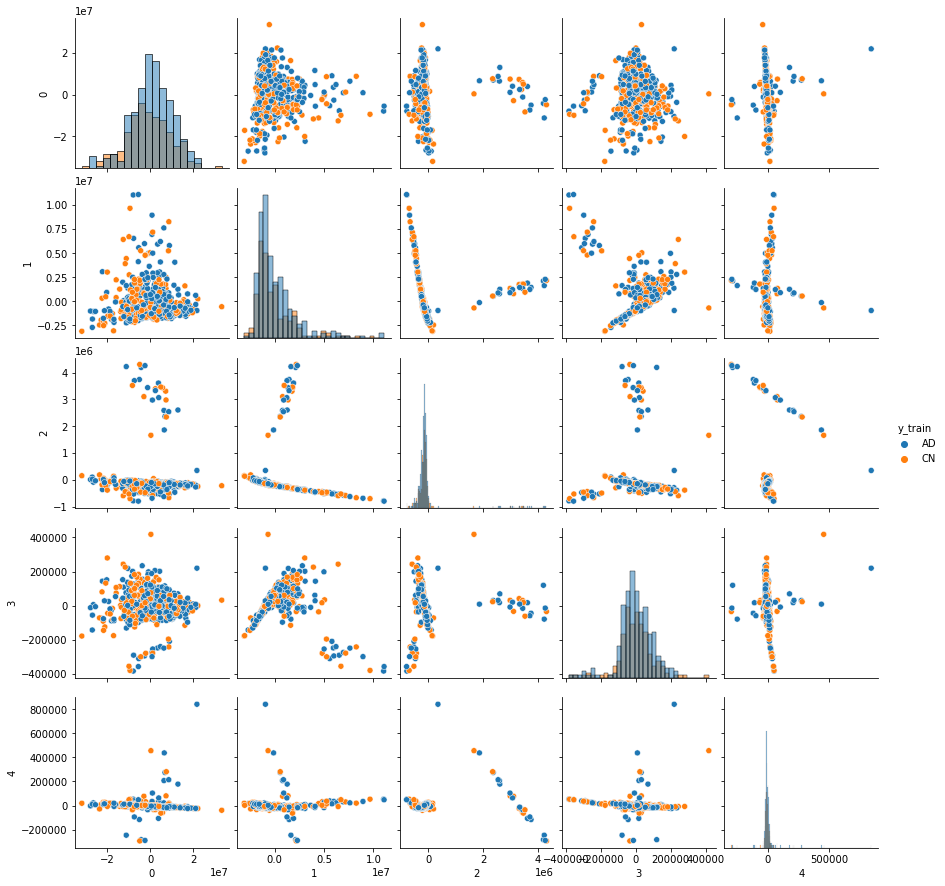

In [44]:
import seaborn as sb
import matplotlib.pyplot as plt
components = 5

# scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# train PCA on components
pca = PCA(components)
# fit components to data
pca.fit(X_train)
# transform train data and apply dimensionality reduction
X_train_trans = pca.transform(X_train)
X_test_trans = pca.transform(X_test)

df_train_trans = pd.DataFrame(X_train_trans)
df_y_train = pd.DataFrame({'y_train': y_train})

data_train = df_train_trans.join(df_y_train)

# Plot first 4 principal components
plt.figure()
sb.pairplot(data_train, hue='y_train', diag_kind='hist')
#plt.close()
plt.show()


## Pipeline

1. Scaler
2. PCA
3. Classifier

In [50]:
# Define steps in pipeline
pca = PCA()
logistic = LogisticRegression(max_iter=10000, tol=0.1)

# Create pipeline with steps: scaler, PCA, classifier
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('logistic', logistic)])

# Define parameters for gridsearch: depending on which classifier
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
}
# Perform Grid Search on pipe
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)

# Print outcome Grid Search
print("Best parameter (CV score=%0.3f):" % search.best_score_)

best_params = search.best_params_
# Meer params als input voor LR: dictionary voor maken

pipe_after_grid = Pipeline([('scaler', scaler), ('pca', PCA((best_params['pca__n_components']))), ('logistic', LogisticRegression((best_params['logistic__C'])))])

# Fit pca on data
#pca.fit(X_train)
bst = pipe_after_grid.fit(X_train, y_train)


Best parameter (CV score=0.825):


ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 10000.0.

## Test performance
